In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence
import warnings
warnings.filterwarnings('ignore')

In [3]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [4]:
print(X_train.shape)

(25000,)


In [5]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [6]:
print(X_train.shape)

(25000, 500)


In [7]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


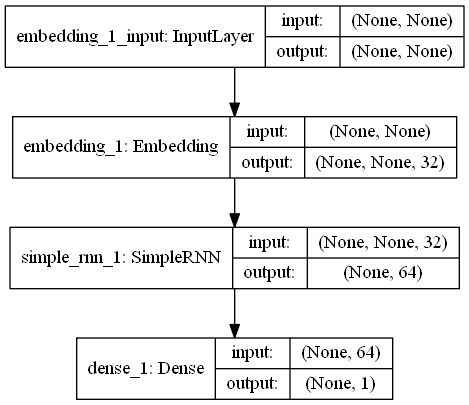

In [10]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "VBU-Group2-RNN.png", show_shapes = True, show_layer_names = True)

In [15]:
history = model.fit(
        X_train,
        y_train,
        epochs = 10,
        batch_size = 512,
        validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.6364 - accuracy: 0.6885 - val_loss: 0.6517 - val_accuracy: 0.6084
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6285 - accuracy: 0.6970 - val_loss: 0.6469 - val_accuracy: 0.6108
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6200 - accuracy: 0.7036 - val_loss: 0.6419 - val_accuracy: 0.6134
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6109 - accuracy: 0.7057 - val_loss: 0.6375 - val_accuracy: 0.6164
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6011 - accuracy: 0.7125 - val_loss: 0.6324 - val_accuracy: 0.6190
Epoch 6/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.5909 - accuracy: 0.7150 - val_loss: 0.6281 - val_accuracy: 0.6208
Epoch 7/10
20000/20000 [==============================] - 34s 2ms/ste

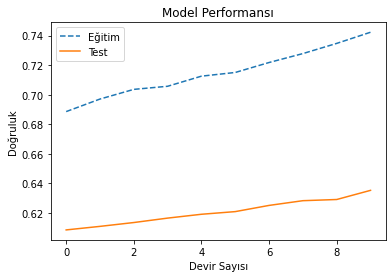

In [16]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.xlabel("Devir Sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

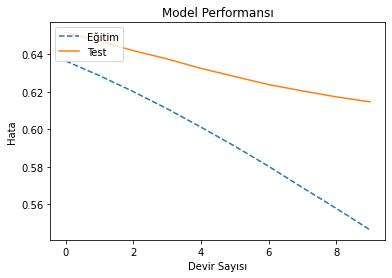

In [17]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Performansı")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

In [18]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Doğruluğu : %.2f%%" % (performans[1]*100))

Modelin Doğruluğu : 64.15%


In [19]:
#Long Short Term Memory (LSTM)

In [20]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [21]:
print(X_train.shape)

(25000,)


In [22]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [23]:
print(X_train.shape)

(25000, 500)


In [25]:
from keras.layers import LSTM

In [26]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = "sigmoid"))

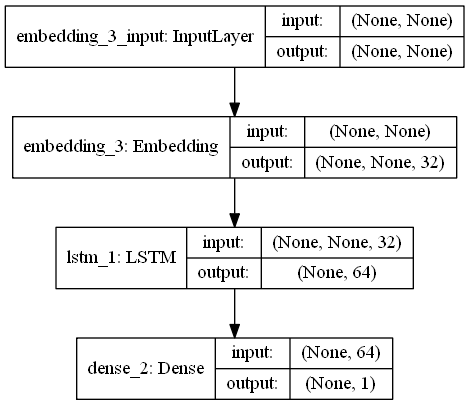

In [27]:
tf.keras.utils.plot_model(model, "VBU-Group2-LSTM.png", show_shapes = True, show_layer_names = True)

In [28]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [29]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
history = model.fit(
        X_train,
        y_train,
        epochs = 10,
        batch_size = 512,
        validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.6620 - accuracy: 0.6197 - val_loss: 0.6314 - val_accuracy: 0.6946
Epoch 2/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.5173 - accuracy: 0.7786 - val_loss: 0.3885 - val_accuracy: 0.8402
Epoch 3/10
20000/20000 [==============================] - 150s 8ms/step - loss: 0.3248 - accuracy: 0.8664 - val_loss: 0.3391 - val_accuracy: 0.8558
Epoch 4/10
20000/20000 [==============================] - 170s 8ms/step - loss: 0.2633 - accuracy: 0.8997 - val_loss: 0.3039 - val_accuracy: 0.8764
Epoch 5/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.2133 - accuracy: 0.9202 - val_loss: 0.3515 - val_accuracy: 0.8464
Epoch 6/10
20000/20000 [==============================] - 195s 10ms/step - loss: 0.2398 - accuracy: 0.9080 - val_loss: 0.2985 - val_accuracy: 0.8778
Epoch 7/10
20000/20000 [==============================] - 200s

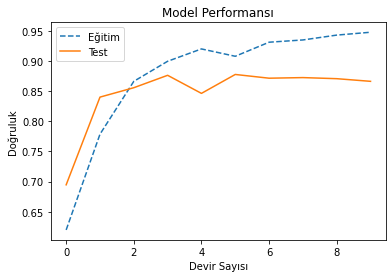

In [31]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.xlabel("Devir Sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

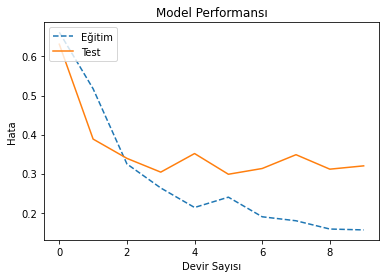

In [32]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Performansı")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

In [33]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Test Performansı : %.2f%%" % (performans[1]*100))

Modelin Test Performansı : 86.54%


In [34]:
#Derin Otokodlayıcılar (Deep Autoencoders)

In [35]:
#inputs = outputs

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [38]:
data = pd.read_csv('mydata/haberman_yeni.csv')
data.head(10)

,Age_of_patient,year_of_operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,60,1,1


In [39]:
print(data.shape)

(299, 4)


In [40]:
X = data.drop("Survival_status", axis = 1)
y = data["Survival_status"]

In [41]:
#Normalizasyon Adımı
from sklearn.preprocessing import MinMaxScaler
op = MinMaxScaler(feature_range = (0,1))
X = op.fit_transform(X)

In [42]:
print(X.shape[1])

3


In [43]:
oznitelik_sayisi = X.shape[1]
girislerin_boyutu = Input(shape = (oznitelik_sayisi, ))

#Kodlanacak Değişkenlerin Sayısı (darboğaz nöron sayısı)
darbogaz_boyutu = 2

#Encoder (Kodlayıcı) katmanlarınınn tanımlanması
kodlayıcı = Dense(3, activation = 'relu')(girislerin_boyutu)
kodlayıcı = Dense(3, activation = 'relu')(girislerin_boyutu)

#Darboğaz tanımlanması
kodlayıcı = Dense(darbogaz_boyutu, activation = 'relu')(kodlayıcı)

#Decoder (kod çözücü) katmanlarının tanımlanması
kod_cozucu = Dense(3, activation = 'sigmoid')(kodlayıcı)
kod_cozucu = Dense(3, activation = 'sigmoid')(kodlayıcı)

In [44]:
otokodlayici = Model(
    inputs = girislerin_boyutu,
    outputs = kod_cozucu
)

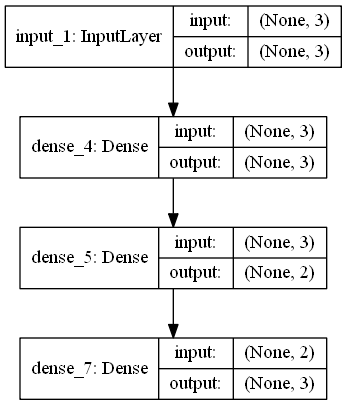

In [45]:
import tensorflow as tf
tf.keras.utils.plot_model(otokodlayici, "haberman2703.png", show_shapes = True, show_layer_names = True)

In [46]:
otokodlayici.compile(loss = 'mse', optimizer = "adam")

In [47]:
history = otokodlayici.fit(
        X,
        X,
        epochs = 100,
        batch_size = 16,
        verbose = 2,
        validation_split = 0.2
)

Train on 239 samples, validate on 60 samples
Epoch 1/100
 - 0s - loss: 0.1092 - val_loss: 0.1353
Epoch 2/100
 - 0s - loss: 0.1061 - val_loss: 0.1348
Epoch 3/100
 - 0s - loss: 0.1038 - val_loss: 0.1345
Epoch 4/100
 - 0s - loss: 0.1021 - val_loss: 0.1341
Epoch 5/100
 - 0s - loss: 0.1006 - val_loss: 0.1338
Epoch 6/100
 - 0s - loss: 0.0993 - val_loss: 0.1334
Epoch 7/100
 - 0s - loss: 0.0981 - val_loss: 0.1329
Epoch 8/100
 - 0s - loss: 0.0970 - val_loss: 0.1326
Epoch 9/100
 - 0s - loss: 0.0958 - val_loss: 0.1323
Epoch 10/100
 - 0s - loss: 0.0947 - val_loss: 0.1319
Epoch 11/100
 - 0s - loss: 0.0937 - val_loss: 0.1316
Epoch 12/100
 - 0s - loss: 0.0926 - val_loss: 0.1312
Epoch 13/100
 - 0s - loss: 0.0916 - val_loss: 0.1309
Epoch 14/100
 - 0s - loss: 0.0907 - val_loss: 0.1305
Epoch 15/100
 - 0s - loss: 0.0897 - val_loss: 0.1302
Epoch 16/100
 - 0s - loss: 0.0888 - val_loss: 0.1298
Epoch 17/100
 - 0s - loss: 0.0879 - val_loss: 0.1294
Epoch 18/100
 - 0s - loss: 0.0870 - val_loss: 0.1291
Epoch 19/1

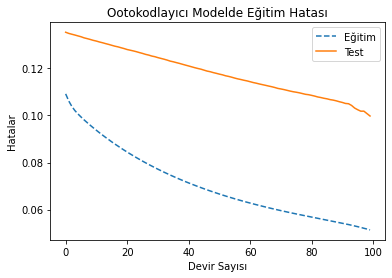

In [48]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Ootokodlayıcı Modelde Eğitim Hatası")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hatalar")
plt.legend(["Eğitim", "Test"], loc = "upper right")
plt.show()

In [49]:
#Yeniden Yapılandırma (reconstruction) hatası

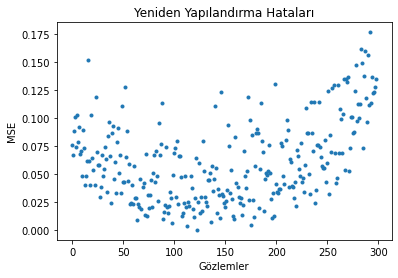

In [52]:
ongoruler = otokodlayici.predict(X)
mse = np.mean(np.power(X - ongoruler, 2), axis = 1)

#Reconstruction hata grafiği
plt.plot(mse, linewidth = 0, label = 'Eğitim', marker = '.')
plt.title('Yeniden Yapılandırma Hataları')
plt.xlabel('Gözlemler')
plt.ylabel('MSE')
plt.show()

In [53]:
print('\n Eşik Değeri Giriniz: \n')
eşik = float(input())


 Eşik Değeri Giriniz: 

0.17


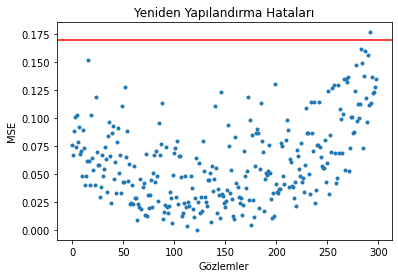

In [54]:
plt.plot(mse, linewidth = 0, label = 'Eğitim', marker = '.')
plt.title('Yeniden Yapılandırma Hataları')
plt.xlabel('Gözlemler')
plt.ylabel('MSE')
plt.axhline(y = eşik, color = 'r')
plt.show()

In [55]:
anormal = pd.DataFrame(data[mse > eşik])
print("Anormal değerlerin sayısı : ", anormal.shape)

Anormal değerlerin sayısı :  (1, 4)


In [56]:
print("Anormal Değerler : ", anormal)

Anormal Değerler :       Age_of_patient  year_of_operation  positive_axillary_nodes  \
292              72                 58                        0   

     Survival_status  
292                1  


In [58]:
anormal_yok = pd.DataFrame(data[mse <= eşik])
print("Önceki Veri :", X.shape)
print("Şimdiki Veri :", anormal_yok.shape)

Önceki Veri : (299, 3)
Şimdiki Veri : (298, 4)


In [60]:
çıkış = pd.DataFrame(anormal_yok)
çıkış.to_csv("mydata/haberman_anomalisiz_yepyeni.csv", index = False)